# Course Project - Machine Learning
<b> Name - Rajesh Lachhmandas Magnani<br />
Student ID - s3814464</b>


# Predicting risk of credit borrowers in Germany

The objective of this project is to build, fit and compare three binary classifiers to predict whether the risk of credit borrower is good or bad using the data retrieved from OpenML. OpenML shows the original data source is UCI Machine Learning Repository(Dr. Hans Hofmann, 1994). <br />
The descriptive features include 7 numeric and 14 nominal categorical features. The target feature has two classes defined as "good" and "bad" respectively. <br />
The full dataset contains 1000 observations.
<br /><br />
<b>Index:</b>
* [Section 1: Overview](#overview)
* [Section 2: Data Preparation](#data_prep)
* [Section 3: Data Exploration](#data_exploration)
* [Section 4: Encoding Categorical Features](#enc)
* [Section 5: Feature Scaling](#scal)
* [Section 6: Feature Selection & Ranking](#fs)
* [Section 7: Train Test Splitting](#tts)
* [Section 8: Hyperparameter tuning](#hyperparameter)
* [Section 9: Performance Comparison](#perf)
* [Section 10: Limitations](#lim)
* [Section 11: Summary](#summ)
* [Section 12: Reference](#ref)

<br /><br />
## Overview <a name="overview"></a>

### Methodology
In this project, I build below three classification models to predict whether the credit risk of borrower is good or bad in Germany: <br />
1) K-Nearest Neighbors (KNN), <br />
2) (Gaussian) Naive Bayes (NB) and <br />
3) Decision Trees (DT) <br />

The first step is doing data transformation on dataset which was cleaned in data preparation stage and explored in data exploration stage. Transformation includes encoding all the categorical features and then scaling descriptive features using Min-Max scaling. Since the full dataset is only 1000 rows, I will use the complete dataset. It is divided into training and test sets with a 70:30 ratio. These means training set will have 700 rows of data whereas test set will have 300 rows of data.
<br /><br />
Given the large number of columns of descriptive features which are 50 after transformation, feature selection will be applied before fitting in the model. Top 12 features are selected by F-Score and Random Forest Importance. The performance of these two feature selection methods are compared and the method which performed the best is chosen for further model fitting.
<br /><br />
Models are trained with hyperparameter search in a pipeline using 5-fold stratified cross-validation (with 'AUC' as the performance metric) based on train data with full features and using same train data but only with top 12 features selected by the feature ranking model in last stage.
<br /> <br />
In this dataset, binary target classes are imbalanced, therefore stratification is necessary throughout the model to ensure training set has same proportion as original dataset.
<br /><br />
In the last step, best models identified from the hyperparameter search on the test data is fitted with 10-fold repeated stratified cross-validation. Model performance is compared by a paired t-test to see if there is any statiscally significant in performance differences. Additionally, I compare the classifiers on other evaluation metrics such as recall, precision and F1-score for a comprehensive and in-depth evaluation.

## Data preparation<a name="data_prep"></a>

### Import dataset

#### Data Source
Dataset to import is germany credit data of year 1994.
Parent source: https://www.openml.org/d/31 <br />

The original data was sourced from UCL Machine Learning Repository. <br />
Link: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)<br />
It was contributed by Dr. Hans Hofmann.
<br />
#### Target Feature
Our target feature is `class`. The value of class can be either 'good' or 'bad'.

#### Descriptive Features

The details below are listed on https://www.openml.org/d/31 site:


`checking_status`: Status of existing checking account, in Deutsche Mark. <br />
`duration`: Duration in months<br />
`credit_history` : Credit history (credits taken, paid back duly, delays, critical accounts)<br />
`puspose`: Purpose of the credit (car, television,...)<br />
`credit_amount`: Credit amount<br />
`saving_status`: Status of savings account/bonds, in Deutsche Mark.<br />
`employment`: Present employment, in number of years.<br />
`installation_commitment`: Installment rate in percentage of disposable income<br />
`personal_status`: Personal status (married, single,...) and sex<br />
`other_parties`: Other debtors / guarantors<br />
`residence_since`: Present residence since X years<br />
`property_magnitude`: Property (e.g. real estate)<br />
`age`: Age in years<br />
`other_payment_plans`: Other installment plans (banks, stores)<br />
`housing`: Housing (rent, own,...)<br />
`existing_credits`: Number of existing credits at this bank<br />
`job`: Job<br />
`num_dependents`: Number of people being liable to provide maintenance for<br />
`own_telephone`: Telephone (yes,no)<br />
`foreign_worker`: Foreign worker (yes,no)<br />


In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

# Import 'dataset_31_credit-g.csv' which is downloaded locally
credit_germany_df = pd.read_csv('s3814464_Data.csv', sep = ',')

# Display randomly selected 10 rows
pd.set_option('display.max_columns', None) 
credit_germany_df.sample(10, random_state=2)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
37,'>=200',18,'existing paid',radio/tv,2100,'<100','1<=X<4',4,'male single','co applicant',2,'real estate',37,stores,own,1,skilled,1,none,yes,bad
726,'no checking',15,'critical/other existing credit',radio/tv,1316,'500<=X<1000','1<=X<4',2,'male mar/wid',none,2,'life insurance',47,none,own,2,'unskilled resident',1,none,yes,good
846,'no checking',18,'existing paid','new car',6761,'no known savings','1<=X<4',2,'male single',none,4,car,68,none,rent,2,skilled,1,none,yes,bad
295,'0<=X<200',48,'existing paid',furniture/equipment,9960,'<100','<1',1,'female div/dep/mar',none,2,car,26,none,own,1,skilled,1,yes,yes,bad
924,'<0',24,'all paid',furniture/equipment,6872,'<100','<1',2,'male div/sep',none,1,'life insurance',55,bank,own,1,skilled,1,yes,yes,bad
658,'0<=X<200',30,'no credits/all paid',business,4221,'<100','1<=X<4',2,'female div/dep/mar',none,1,car,28,none,own,2,skilled,1,none,yes,good
682,'no checking',15,'delayed previously',radio/tv,1478,'<100','1<=X<4',4,'male mar/wid',none,3,'real estate',33,bank,own,2,skilled,1,none,yes,good
286,'<0',48,'existing paid','used car',4788,'<100','4<=X<7',4,'male single',none,3,'life insurance',26,none,own,1,skilled,2,none,yes,good
880,'no checking',24,'existing paid','used car',7814,'<100','4<=X<7',3,'male single',none,3,car,38,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
272,'0<=X<200',48,'all paid','new car',12169,'no known savings',unemployed,4,'male single','co applicant',4,'no known property',36,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,good


### Data Cleaning and Transformation

To check the data has successfully loaded and features and rows are correct.

In [2]:
print(f"Shape of the dataset is {credit_germany_df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(credit_germany_df.dtypes)

Shape of the dataset is (1000, 21) 

Data types are below where 'object' indicates a string type: 
checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object


### Checking for Missing Values

In [3]:
credit_germany_df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

There are no missing values in this dataset.

### Summary Statistics

<b>Summary statistics for numerical features.</b>

In [4]:
credit_germany_df.describe(include = np.number).round(2)  # numerical features

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.90,3271.26,2.97,2.84,35.55,1.41,1.16
std,12.06,2822.74,1.12,1.10,11.38,0.58,0.36
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00


No outliers detection and removal will be required as all values in numerical features are sensible.
<br /><br />
<b>Summary statistics for categorical features.</b>

In [5]:
credit_germany_df.describe(include = np.object).round(2) #categorical features

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,'no checking','existing paid',radio/tv,'<100','1<=X<4','male single',none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


### Finding unique values of categorical features

In [6]:
# Categorical columns
categorical_cols = credit_germany_df.columns[credit_germany_df.dtypes==object].tolist()

# Get unique values of all categorical columns
for col in categorical_cols:
    print('\nUnique values of column ' + col + ' are:')
    print(credit_germany_df[col].unique())


Unique values of column checking_status are:
["'<0'" "'0<=X<200'" "'no checking'" "'>=200'"]

Unique values of column credit_history are:
["'critical/other existing credit'" "'existing paid'"
 "'delayed previously'" "'no credits/all paid'" "'all paid'"]

Unique values of column purpose are:
['radio/tv' 'education' 'furniture/equipment' "'new car'" "'used car'"
 'business' "'domestic appliance'" 'repairs' 'other' 'retraining']

Unique values of column savings_status are:
["'no known savings'" "'<100'" "'500<=X<1000'" "'>=1000'" "'100<=X<500'"]

Unique values of column employment are:
["'>=7'" "'1<=X<4'" "'4<=X<7'" 'unemployed' "'<1'"]

Unique values of column personal_status are:
["'male single'" "'female div/dep/mar'" "'male div/sep'" "'male mar/wid'"]

Unique values of column other_parties are:
['none' 'guarantor' "'co applicant'"]

Unique values of column property_magnitude are:
["'real estate'" "'life insurance'" "'no known property'" 'car']

Unique values of column other_payment_p

### Removing quotes from the categorical features

Removing the quotation(') to make data look more cleaner.

In [7]:
for col in categorical_cols:
    credit_germany_df[col] = credit_germany_df[col].replace({"'" : ''}, regex=True)

### Data aggregation and renaming columns

There are 10 unique values in `purpose` feature. Most of values can be combined and categorised.<br />
'furniture/equipment', 'radio/tv', 'domestic appliance' and 'repairs' can all be combined and called 'home improvements'.<br />
'used car' and 'new car' can all be combined and called 'car'.<br />
'retraining' can be fitted into 'education' category.<br />
<br />
There are 5 unique values in feature `personal_status`. The values are combined and categorised into 'male' and 'female' instead and column is renamed and called `gender`.
<br /><br />
For `credit_history` feature, me will merge value 'all paid' into 'no credits/all paid' category.

In [8]:
# Data aggregation in `purpose` feature
# part 1
credit_germany_df.loc[(credit_germany_df['purpose'] == 'furniture/equipment') | (credit_germany_df['purpose'] == 'radio/tv')
                     | (credit_germany_df['purpose'] == 'domestic appliance') | (credit_germany_df['purpose'] == 'repairs'), 'purpose'] = 'home improvements'
# part 2
credit_germany_df.loc[(credit_germany_df['purpose'] == 'used car') | (credit_germany_df['purpose'] == 'new car'), 'purpose'] = 'car'
# part 3
credit_germany_df.loc[(credit_germany_df['purpose'] == 'retraining'), 'purpose'] = 'education'

# Changing categories of `personal_status` feature and renaming column to 'gender'
credit_germany_df.loc[(credit_germany_df['personal_status'] != 'female div/dep/mar'), 'personal_status'] = 'male'
credit_germany_df.loc[(credit_germany_df['personal_status'] == 'female div/dep/mar'), 'personal_status'] = 'female'
# Renaing column
credit_germany_df.rename(columns={'personal_status':'gender'}, inplace=True)

# Data aggregation in `credit_history` feature
credit_germany_df.loc[(credit_germany_df['credit_history'] == 'all paid'), 'credit_history'] = 'no credits/all paid'

# Displaying the data frame after making the change
import pandas as pd 
pd.set_option('display.max_columns', None)
credit_germany_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,gender,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,home improvements,1169,no known savings,>=7,4,male,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,home improvements,5951,<100,1<=X<4,2,female,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,home improvements,7882,<100,4<=X<7,2,male,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,car,4870,<100,1<=X<4,3,male,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad


## Data Exploration <a name="data_exploration"></a>

Data is cleaned and ready for exploration. <br />
Data will be visualised in this section.<br /><br />

Importing modules required by data exploration.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

### Univariate Visualisation
Figure 1 - Box plot of `age` feature.

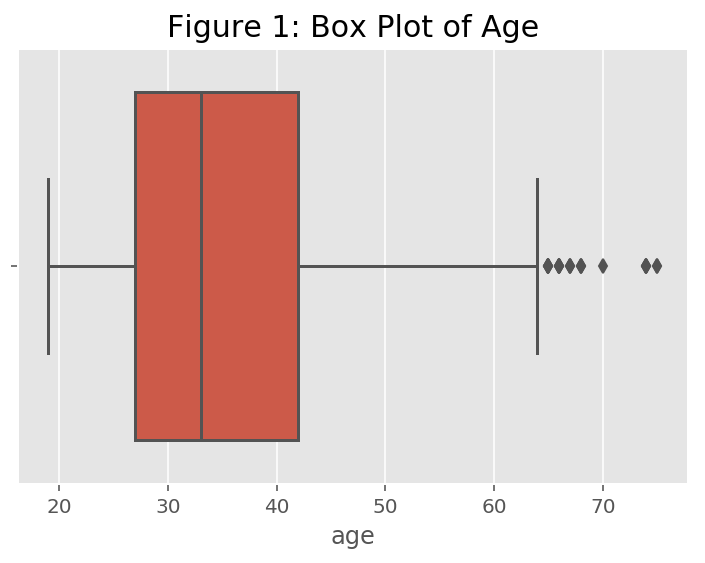

In [10]:
# get a box plot of age
sns.boxplot(credit_germany_df['age']).set_title('Figure 1: Box Plot of Age', fontsize = 15)
plt.show();

The plot in figure-1 shows majority of the borrowers are between late twenties and early forties.

Figure 2 - Box plot of `credit_amount` feature.

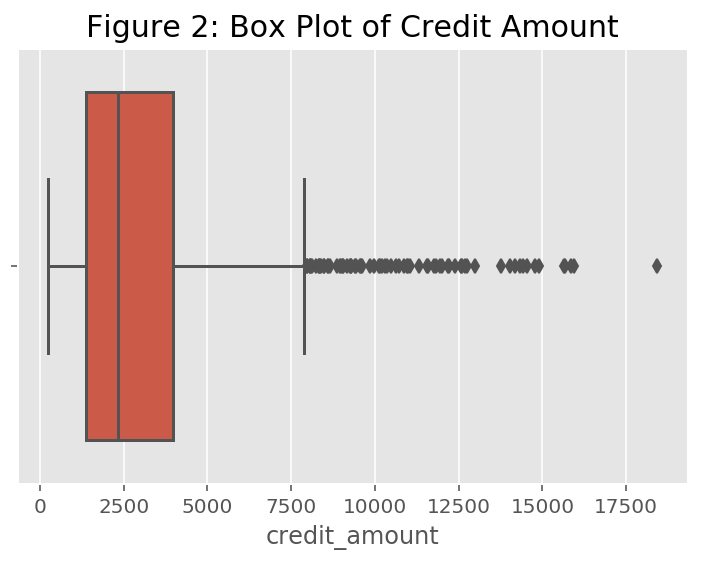

In [11]:
# get a box plot of credit_amount
sns.boxplot(credit_germany_df['credit_amount']).set_title('Figure 2: Box Plot of Credit Amount', fontsize = 15)
plt.show();

The box plot in figure 2 shows majority the credit amount borrowed is between 2,500 till around 4,500 and go as high as around 20,000.

Figure 3 - Box plot of `duration` feature.

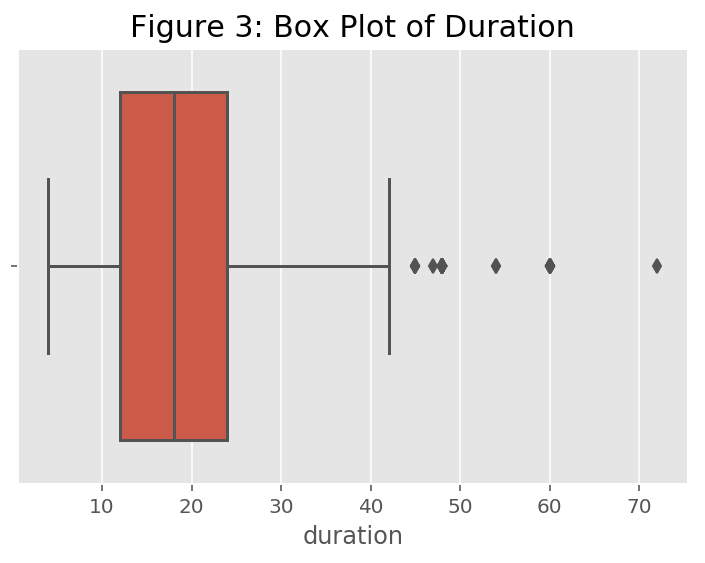

In [12]:
# get a box plot of duration
sns.boxplot(credit_germany_df['duration']).set_title('Figure 3: Box Plot of Duration', fontsize = 15)
plt.show();

Box plot in figure 3 shows majority of credit payment has duration of 12 to 24 months.

Figure 4 - Pie-chart of `purpose` categorical feature.

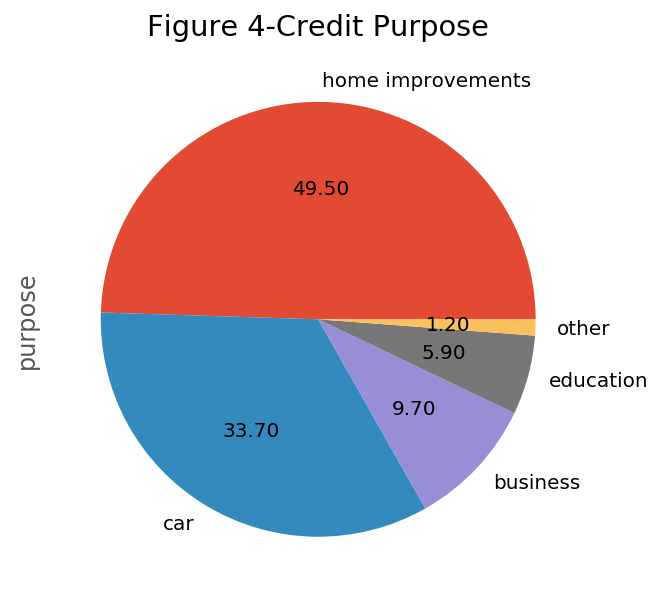

In [13]:
credit_germany_df['purpose'].value_counts().plot(kind='pie',autopct='%.2f',figsize=(5,5),title = "Figure 4-Credit Purpose")

Pie chart in figure 4 shows the purpose of most of the credit is for 'home_improvements' followed by the 'car'. Least common is 'other'.

Figure 5 - Bar chart of `gender` categorical feature.

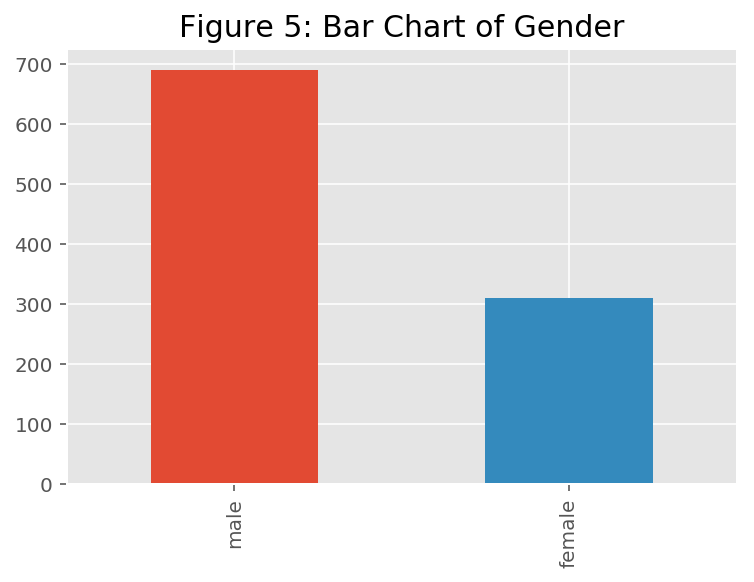

In [14]:
bar = credit_germany_df['gender'].value_counts().plot(kind = 'bar')
bar.set_xticklabels(bar.get_xticklabels(), rotation = 90)
plt.title('Figure 5: Bar Chart of Gender', fontsize = 15)
plt.show();

Bar plot in figure 5 shows there are almost twice as many male as female in this dataset.

### Multivariate visualisation

Two or three features are visualised in this section.

Figure 6 -Histogram of credit `purpose` by `age`

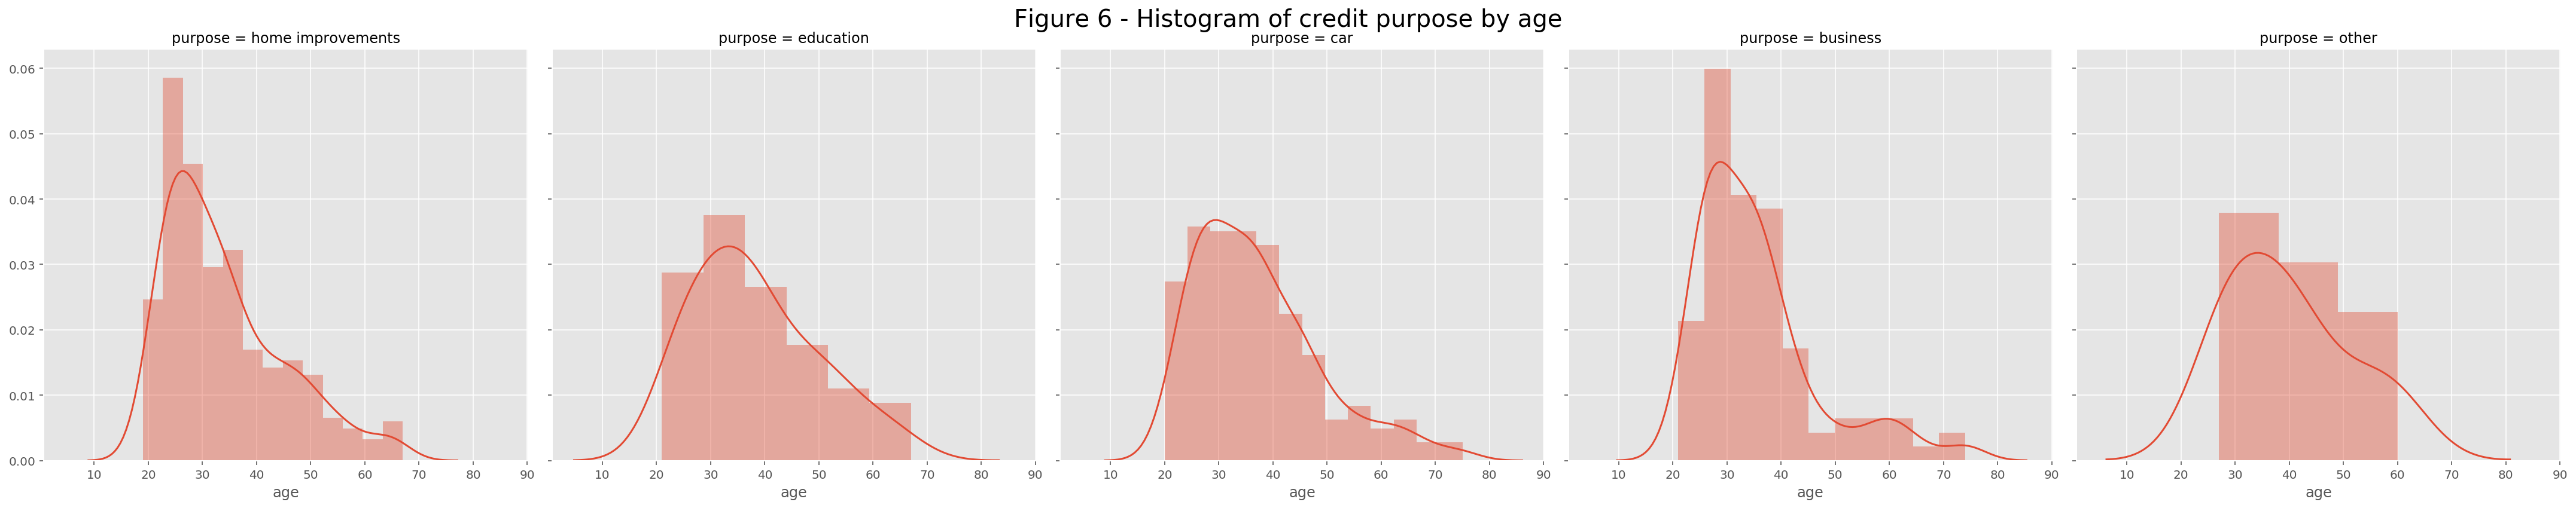

In [15]:
s=sns.FacetGrid(credit_germany_df,
                height=6,
                col="purpose");

s=s.map(sns.distplot,
        'age');
plt.subplots_adjust(top=0.9)
s.fig.suptitle('Figure 6 - Histogram of credit purpose by age', fontsize=20);

Histogram in figure 6 shows that majority of loan borrowed by people in mid and late twenties are for either 'home improvements' or 'business'. Other than that it shows no clear relation between purpose of the credit and age of the borrowers.

Figure 7 - Box plot of `credit_amount` by `purpose`

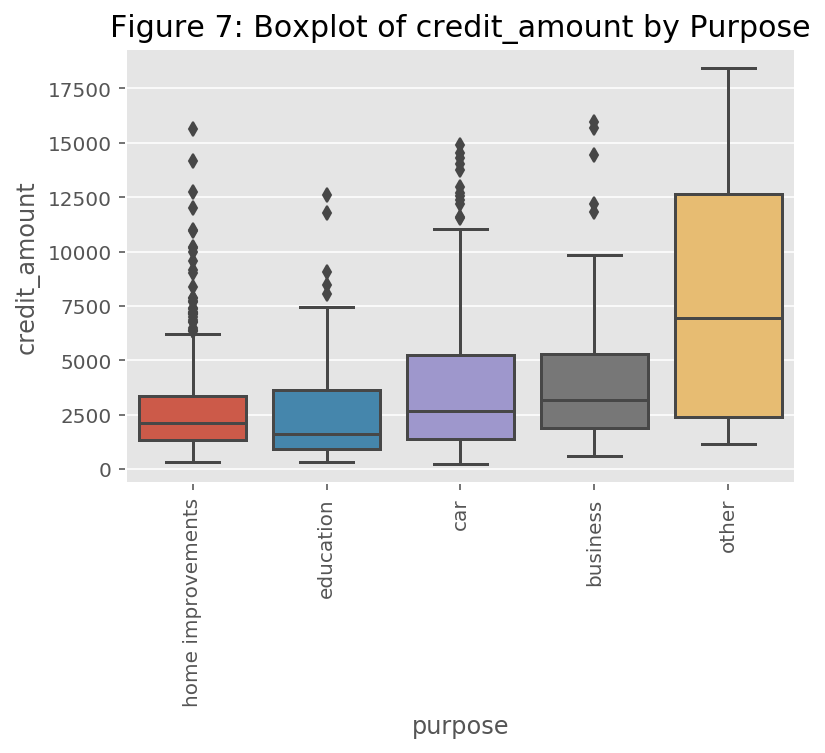

In [16]:
# Creating a boxplot
boxplot = sns.boxplot(credit_germany_df['purpose'], credit_germany_df['credit_amount']);
plt.title('Figure 7: Boxplot of credit_amount by Purpose', fontsize = 15)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation = 90)
plt.show();

Box plot in figure 7 shows the amount of credit borrowed for 'home improvements' and 'education' purpose is the lowest which is followed by  'car', 'business' and 'other'.

Figure 8 - Scatter plot of `credit_amount` by `age` coloured by `class`.

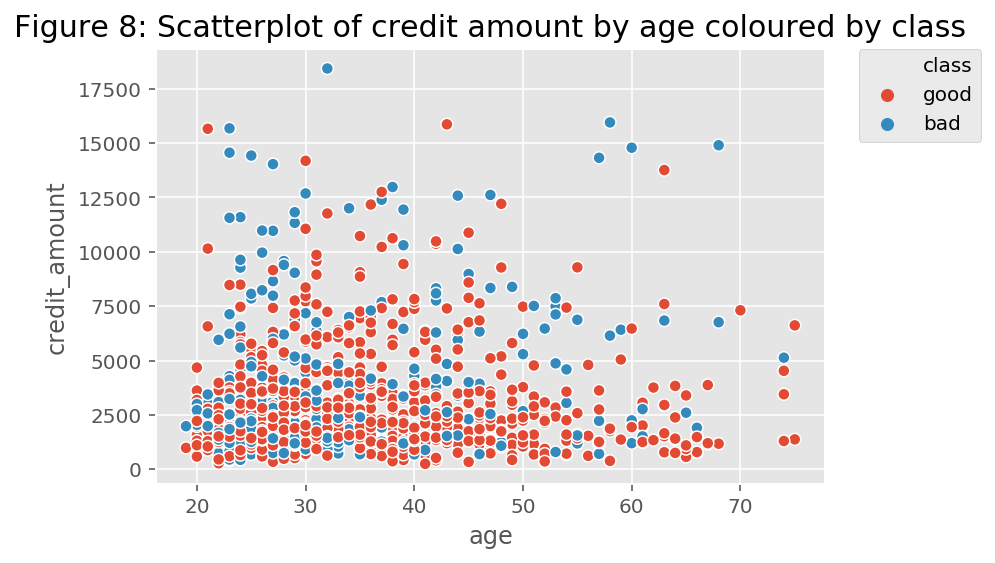

In [17]:
# creating a scatterplot
sns.scatterplot(credit_germany_df['age'], credit_germany_df['credit_amount'], hue = credit_germany_df['class'])
plt.title('Figure 8: Scatterplot of credit amount by age coloured by class', fontsize = 15);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

Scatter plot in figure 8 shows that there is no clear pattern other than increase in credit amount do tend to increase credit risk in all age groups.


Figure 9 - Box plot of `credit_amount` by `gender` coloured by `purpose`.

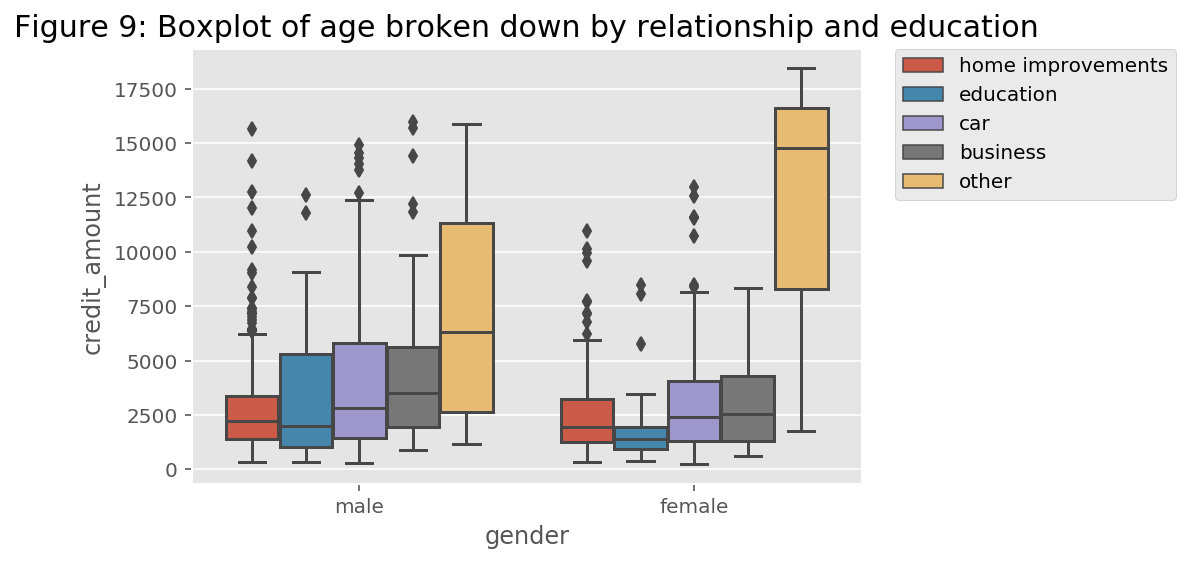

In [18]:
# Creating the boxplot
sns.boxplot(credit_germany_df['gender'], credit_germany_df['credit_amount'], 
            hue = credit_germany_df['purpose'])
plt.title('Figure 9: Boxplot of age broken down by relationship and education', fontsize = 15)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

Box plot in figure 9 shows that male tends to borrow more credit amount compare to women for all but one purpose i.e. 'Other' where women tend to borrow more money.

## Encoding Categorical Features<a name ="enc"></a>

Categorical features will be encoded into numerical features as Scikit-learn modules requires all data to be numeric.

Encoding is done on `target` feature first.

### Target Feature
Target feature is `class`.

In [19]:
target = credit_germany_df['class']
target.value_counts()

good    700
bad     300
Name: class, dtype: int64

target `class` is imbalanced. There are twice as many 'good' as compare to 'bad'.

'good' is positive target feature and will be encoded as '1' whereas 'bad' will be encoded as '0'  

In [20]:
## Encoding Target Feature
## 1 = good, 0 = bad 
from sklearn import preprocessing

target = preprocessing.LabelEncoder().fit_transform(target)
np.unique(target, return_counts = True)
## alphabetically it is bad = 0 and good = 1

(array([0, 1]), array([300, 700]))

### Encoding Categorical Descriptive Features

13 out of 20 descriptive features are nominal. One-hot-encoding is performed on those features to convert them into numerical.
All nominal features with two levels are encoded in single column with values 0 and 1.<br />
Nominal features with more than two levels will be encoded using one-hot-encoding. It creates binary columns for each unique values for such more than two levels of nominal features.

In [21]:
credit_germany_df = credit_germany_df.drop(columns='class')

categorical_onehot_cols = credit_germany_df.columns[credit_germany_df.dtypes==object].tolist()

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_onehot_cols:
    n = len(credit_germany_df[col].unique())
    if (n == 2):
        credit_germany_df[col] = pd.get_dummies(credit_germany_df[col], drop_first=True)

# for other categorical features (with > 2 levels), 
# use regular one-hot-encoding 
# if a feature is numeric, it will be untouched
credit_germany_df = pd.get_dummies(credit_germany_df)

# Display data frame after encoding
import pandas as pd 
pd.set_option('display.max_columns', None)
credit_germany_df.head()

,duration,credit_amount,installment_commitment,gender,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_car,purpose_education,purpose_home improvements,purpose_other,savings_status_100<=X<500,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,6,1169,4,1,4,67,2,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,48,5951,2,0,2,22,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
2,12,2096,2,1,3,49,1,2,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,42,7882,2,1,4,45,1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
4,24,4870,3,1,4,53,2,2,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0


## Feature Scaling<a name="scal"></a>

Scaling normalise numeric values among different variables within specific range. This can help in increasing the processing time of the algorithm.<br />
For this data set, Min-Max Scaling is applied to scale the descriptive features between 0 and 1. <br />
Binary features are not changed during this process and remains binary after scaling.


In [22]:
# Scaling using Min-Max Scaling approach
Data = preprocessing.MinMaxScaler().fit_transform(credit_germany_df)

pd.DataFrame(Data, columns=credit_germany_df.columns).sample(5, random_state=2)

,duration,credit_amount,installment_commitment,gender,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_car,purpose_education,purpose_home improvements,purpose_other,savings_status_100<=X<500,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
37,0.205882,0.101794,1.000000,1.0,0.333333,0.321429,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
726,0.161765,0.058655,0.333333,1.0,0.333333,0.500000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
846,0.205882,0.358259,0.333333,1.0,1.000000,0.875000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
295,0.647059,0.534280,0.000000,0.0,0.333333,0.125000,0.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
924,0.294118,0.364367,0.333333,1.0,0.000000,0.642857,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Feature Selection & Ranking<a name="fs"></a>
The K-Nearest Neighbor classifier is used as a wrapper to compare performance of 'Random Forest Importance' and 'F-Score' feature selection methods. <br />
I have used stratified 5-fold cross validation with 3 repetitions for analysis.

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf_knn = KNeighborsClassifier()
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=2)

# Set scoring metric to 'roc_auc'
scoring_metric = 'roc_auc'
# Set num_feature value
num_features = 12

### Performance with Full Set of Features

In [24]:
from sklearn.model_selection import cross_val_score
cv_results_full = cross_val_score(estimator=clf_knn,
                             X=Data,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_full.mean()

0.7137261904761905

### Random Forest Importance
<b> Top 12 features performance selected by RFI</b>

In [25]:
from sklearn.ensemble import RandomForestClassifier

model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = credit_germany_df.columns[fs_indices_rfi].values
print(f"Best 12 Features in Random Forest Importance:\n {best_features_rfi}\n\n")

feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
print(f"Importance of the top 12 features in Randome Forest Importance are:\n {feature_importances_rfi}\n\n")

cv_results_rfi = cross_val_score(estimator=clf_knn,
                             X=Data[:, fs_indices_rfi],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
print(f"AUC score for the top 12 features selected by Random Forest Importance is: {cv_results_rfi.mean()}")

Best 12 Features in Random Forest Importance:
 ['credit_amount' 'age' 'duration' 'checking_status_no checking'
 'installment_commitment' 'checking_status_<0' 'residence_since'
 'savings_status_<100' 'credit_history_no credits/all paid'
 'existing_credits' 'gender'
 'credit_history_critical/other existing credit']


Importance of the top 12 features in Randome Forest Importance are:
 [0.11169794 0.08932382 0.08561922 0.05605965 0.03934062 0.03587396
 0.0356159  0.0229629  0.02168806 0.01962389 0.01951021 0.01856034]


AUC score for the top 12 features selected by Random Forest Importance is: 0.6916666666666667


### F-Score
<b> Top 12 features performance selected by F-Score</b>

In [26]:
from sklearn import feature_selection as fs

fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:num_features]

best_features_fscore = credit_germany_df.columns[fs_indices_fscore].values
print(f"Best 12 Features in F-Score:\n {best_features_fscore}\n\n")

feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(f"Importance of the top 12 features in F-Score are:\n {best_features_fscore}\n\n")

cv_results_fscore = cross_val_score(estimator=clf_knn,
                             X=Data[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean()
print(f"AUC score for the top 12 features selected by F-Score is: {cv_results_fscore.mean()}")

Best 12 Features in F-Score:
 ['checking_status_no checking' 'checking_status_<0' 'duration'
 'credit_history_no credits/all paid'
 'credit_history_critical/other existing credit' 'savings_status_<100'
 'credit_amount' 'housing_own' 'savings_status_no known savings'
 'property_magnitude_no known property' 'checking_status_0<=X<200'
 'property_magnitude_real estate']


Importance of the top 12 features in F-Score are:
 ['checking_status_no checking' 'checking_status_<0' 'duration'
 'credit_history_no credits/all paid'
 'credit_history_critical/other existing credit' 'savings_status_<100'
 'credit_amount' 'housing_own' 'savings_status_no known savings'
 'property_magnitude_no known property' 'checking_status_0<=X<200'
 'property_magnitude_real estate']


AUC score for the top 12 features selected by F-Score is: 0.7157222222222221


### Performance Comparison Using Paired T-Tests

At a 95% significance level, if the p-value is smaller than 0.05, it concludes that the difference is statistically significant.

In [27]:
from scipy import stats
print(f"P-value for performance of full features vs top 12 features selected by F-Score: {stats.ttest_rel(cv_results_full, cv_results_fscore).pvalue.round(3)}")
print(f"P-value for performance of full features vs top 12 features selected by RFI: {stats.ttest_rel(cv_results_full, cv_results_rfi).pvalue.round(3)}")
print(f"P-value for performance of top 12 feature selected by RFI vs top 12 features selected by F-Score: {stats.ttest_rel(cv_results_rfi, cv_results_fscore).pvalue.round(3)}")

P-value for performance of full features vs top 12 features selected by F-Score: 0.815
P-value for performance of full features vs top 12 features selected by RFI: 0.035
P-value for performance of top 12 feature selected by RFI vs top 12 features selected by F-Score: 0.005



pvalue indicates that there is no statistical difference between performance of full feature and Top 12 feature selected by F-Score. <br />
p-value also indicates that statistically top 12 feature selected by F-Score performs better than top 12 feature selected by Random Forest Importance.
<br /><br />
Therefore, for our further assessment, I continue with top 12 features selected by F-Score as shown in the below figure. <br />
In this figure, it shows that the importance decreases sharply after the top feature and then gradually decreases till the last feature.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

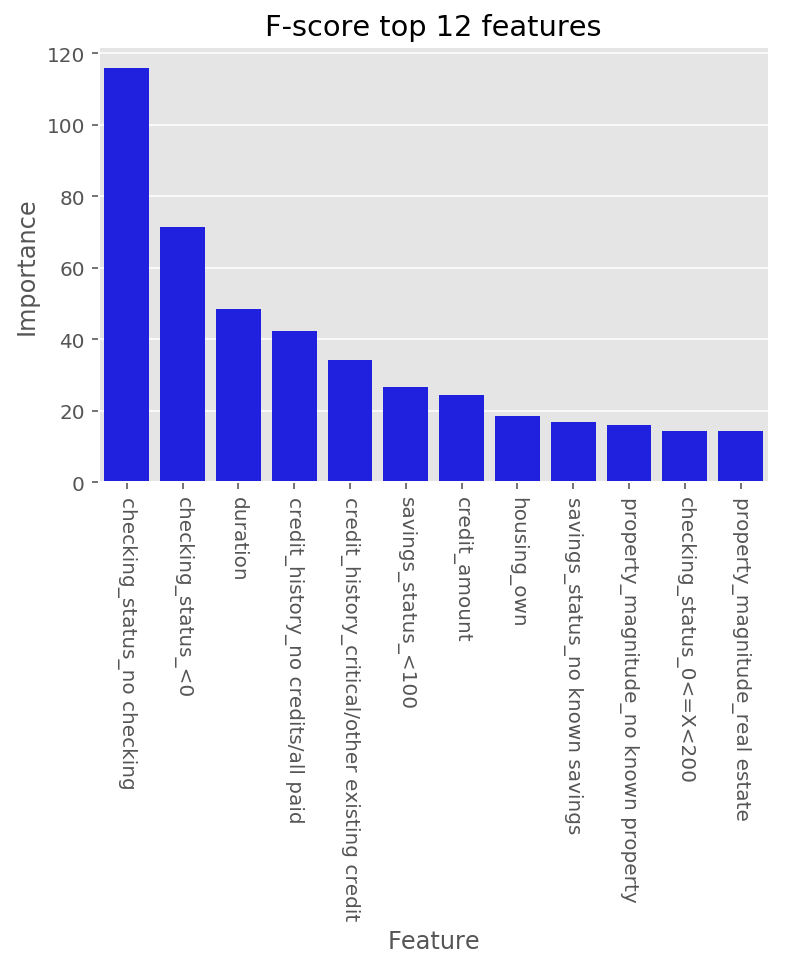

In [28]:
feature_ranking = pd.DataFrame({'Feature': best_features_fscore, 
                                'Importance': list(feature_importances_fscore)}, 
                               columns=['Feature', 'Importance'])
import seaborn as sns
sns.barplot(x="Feature",y="Importance",
            color='blue',data=feature_ranking)
plt.title("F-score top 12 features")
plt.xticks(rotation=270)

## Train-Test Splitting<a name ="tts"></a>

Using stratification, dataset is split into train and test sets at a 70:30 ratio:
<br />
* Training(70%): D_train (descriptive), t_train (target).
* Testing(30%): D_test (desciptive), t_test (target).
<br /><br />

I have also created D_train_12 and D_test_12, which have the sample rows same as D_train and D_test, but only have the top 12 features selected by F-score from the last step.

In [29]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target,
                                                    stratify = target,
                                                    test_size = 0.3,
                                                    random_state=2)
print(f"Shape of D_train is {D_train.shape[0]} rows and {D_train.shape[1]} features.")
print(f"Shape of D_test is {D_test.shape[0]} rows and {D_test.shape[1]} features.\n")

# Trainin and testing test for top 12 features selected by F-score
D_train_12 = pd.DataFrame(D_train, columns=credit_germany_df.columns)
D_train_12 = D_train_12[best_features_fscore].values
D_test_12 = pd.DataFrame(D_test, columns=credit_germany_df.columns)
D_test_12 = D_test_12[best_features_fscore].values
print(f"Shape of D_train_12 is {D_train_12.shape[0]} rows and {D_train_12.shape[1]} features.")
print(f"Shape of D_test_12 is {D_test_12.shape[0]} rows and {D_test_12.shape[1]} features.")

Shape of D_train is 700 rows and 50 features.
Shape of D_test is 300 rows and 50 features.

Shape of D_train_12 is 700 rows and 12 features.
Shape of D_test_12 is 300 rows and 12 features.


## Hyperparameter tuning<a name ="hyperparameter"></a>

In this section, I train and fine tune the models based on the 700 rows of training data. Additionally, I compare the performance of models with the full features and top 12 features picked by F-Score.

All models are analysed by 5-fold stratified cross-validation for hyperparameter tuning.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits = 5,random_state=2)

Defining the functions below to be used to run grid search and plotting label value.<br />
It is created so that I don't have to run same line of code for 6 times.

In [31]:
# Fitting the model
def getResults(model, fit_x, title):
    model.fit(fit_x, t_train)
    results_df = pd.DataFrame(model.cv_results_['params'])
    results_df['score'] = model.cv_results_['mean_test_score']
    print(f"\nBest Parameters for {title}: {model.best_params_}") 
    print(f"\nBest Score for {title}: {model.best_score_}")
    print(f"\nBest estimator for {title}: {model.best_estimator_}")
    
    return (model.best_estimator_, results_df)

# Setting plot_title, x_label and y_label
def quickPlot(df_pivot, plot_title, x_label, y_label):
    if not isinstance(df_pivot, type(None)):
        df_pivot.plot()
        plt.legend(loc='Top', bbox_to_anchor=(1.2, 1))
        
    plt.title(plot_title, fontsize=11)
    plt.xlabel(x_label, fontsize=11)
    plt.ylabel(y_label, fontsize=11)

## K Nearest Neighbor
Grid search is used for hyperparameter tuning in a pipeline and KNN model is trained via cross validator with different k-nearest neighbors and distance types.<br />

<b>Full Features</b>

In [32]:
params_knn = {'n_neighbors': [2,5,7,9,10,12], 
              'p': [1, 2, 5]}
gs_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_knn, 
                      cv=cv_method,
                      verbose=1, 
                      scoring=scoring_metric)

knn_best, results_knn = getResults(gs_knn, D_train, 'K-Nearest Neighbor with full features')
results_knn.head()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Parameters for K-Nearest Neighbor with full features: {'n_neighbors': 12, 'p': 1}

Best Score for K-Nearest Neighbor with full features: 0.7240038872691934

Best estimator for K-Nearest Neighbor with full features: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=1,
           weights='uniform')


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   28.1s finished


,n_neighbors,p,score
0,2,1,0.647692
1,2,2,0.648494
2,2,5,0.647036
3,5,1,0.688484
4,5,2,0.688508


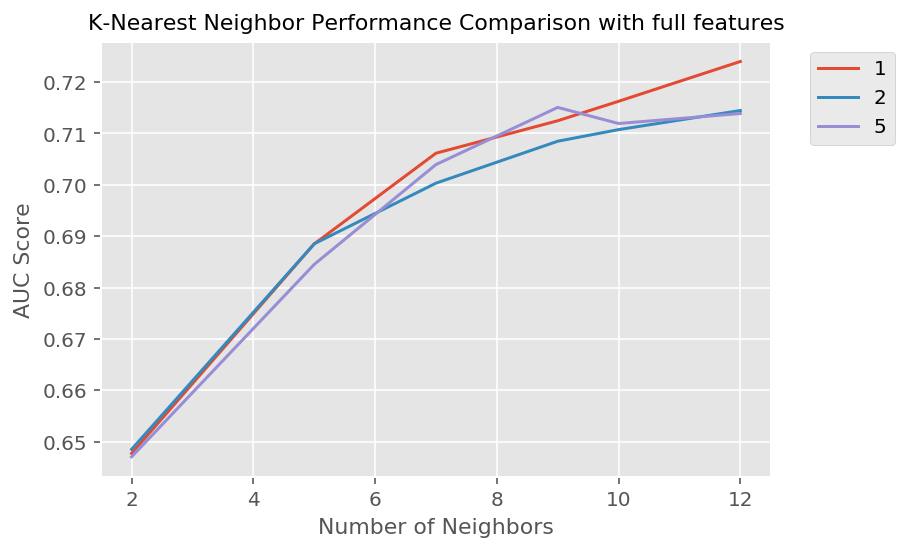

In [33]:
df_knn = results_knn.pivot(index='n_neighbors',columns='p',values='score')
quickPlot(df_knn, 'K-Nearest Neighbor Performance Comparison with full features', 'Number of Neighbors', 'AUC Score')

<b> Top 12 features selected by F-Score</b>

In [34]:
knn_best12, results_knn12 = getResults(gs_knn, D_train_12, 'K-Nearest Neighbor with top 12 features')
results_knn12.head()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Parameters for K-Nearest Neighbor with top 12 features: {'n_neighbors': 12, 'p': 5}

Best Score for K-Nearest Neighbor with top 12 features: 0.7391399416909621

Best estimator for K-Nearest Neighbor with top 12 features: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=5,
           weights='uniform')


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    5.3s finished


,n_neighbors,p,score
0,2,1,0.654373
1,2,2,0.648105
2,2,5,0.646672
3,5,1,0.716059
4,5,2,0.712804


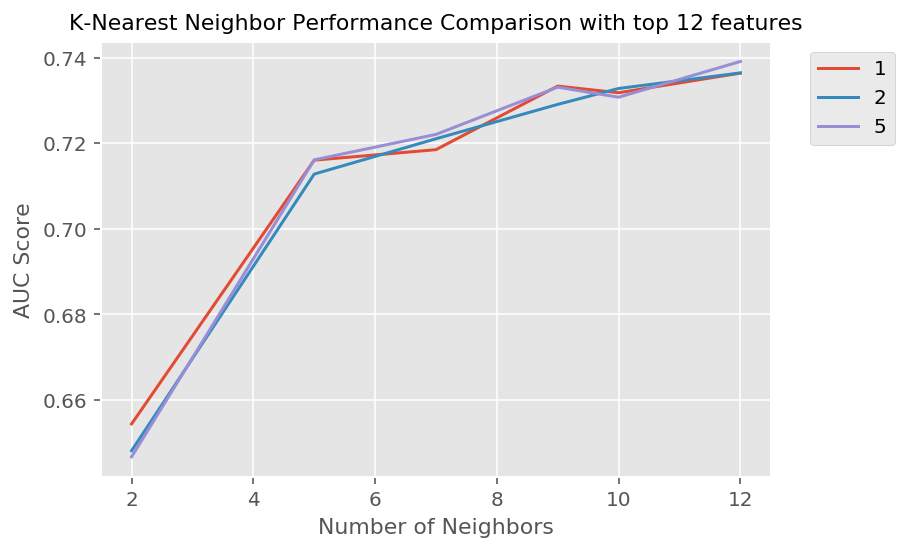

In [35]:
df_knn12 = results_knn12.pivot(index='n_neighbors',columns='p',values='score')
quickPlot(df_knn12, 'K-Nearest Neighbor Performance Comparison with top 12 features', 'Number of Neighbors', 'AUC Score')

Best AUC Score for K-Nearest Neighbor with full features is 0.7240038872691934. <br />
Best AUC Score for K-Nearest Neighbor with top 12 features selected by F-Score is 0.7391399416909621.<br />

This shows feature selection has improved the performance.

## (Gaussian) Naive Bayes (NB)

I added various var_smoothing to search for the optimal Gaussian NB model, starting with 10 and ending with 10^−3 with 200 different values. <br />
As Naive Bayes(NB) requires for all descriptive features to follow a Gaussian distribution, I perform a power transformation on the input data before fitting into the algorithm.

In [36]:
from sklearn.preprocessing import PowerTransformer
D_train_trans = PowerTransformer().fit_transform(D_train)
D_train_12_trans = PowerTransformer().fit_transform(D_train_12)

<b>Full Features</b>

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

params_nb ={'var_smoothing': np.logspace(1,-3,num=200)}
gs_nb = GridSearchCV(estimator=GaussianNB(),
                   param_grid=params_nb,
                   cv=cv_method,
                   verbose=1,
                   scoring=scoring_metric)

nb_best, results_nb = getResults(gs_nb, D_train_trans, 'Naive Bayes with full features')
results_nb.head()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Parameters for Naive Bayes with full features: {'var_smoothing': 10.0}

Best Score for Naive Bayes with full features: 0.7724489795918368

Best estimator for Naive Bayes with full features: GaussianNB(priors=None, var_smoothing=10.0)


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.3s finished


,var_smoothing,score
0,10.000000,0.772449
1,9.547716,0.771963
2,9.115888,0.772012
3,8.703591,0.771769
4,8.309942,0.771769


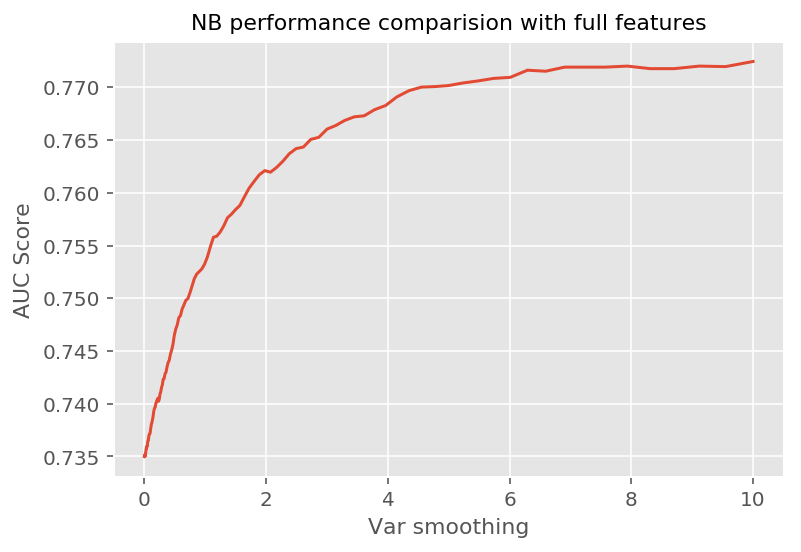

In [38]:
results_nb.plot(kind='line',x='var_smoothing',y='score', legend=None)
quickPlot(None,'NB performance comparision with full features', 'Var smoothing', 'AUC Score')

<b> Top 12 features selected by F-Score</b>

In [39]:
nb_best12, results_nb12 = getResults(gs_nb, D_train_12_trans, 'Naive Baive with top 12 features')
results_nb12.head()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Parameters for Naive Baive with top 12 features: {'var_smoothing': 10.0}

Best Score for Naive Baive with top 12 features: 0.7697764820213798

Best estimator for Naive Baive with top 12 features: GaussianNB(priors=None, var_smoothing=10.0)


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.2s finished


,var_smoothing,score
0,10.000000,0.769776
1,9.547716,0.769436
2,9.115888,0.769242
3,8.703591,0.769048
4,8.309942,0.768999


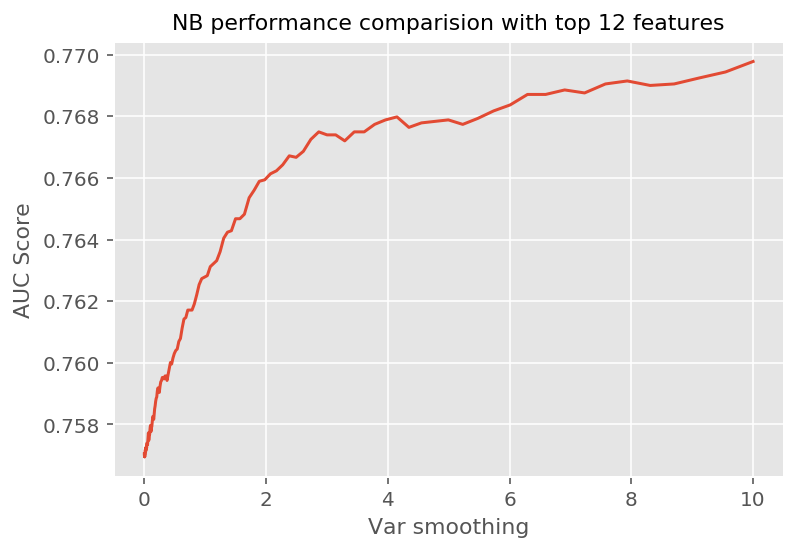

In [40]:
results_nb12.plot(kind='line',x='var_smoothing',y='score', legend=None)
quickPlot(None,'NB performance comparision with top 12 features', 'Var smoothing', 'AUC Score')

Best AUC Score for Naive Bayes with full features is 0.7724489795918368.<br />
Best AUC Score for Naive Bayes with top 12 features selected by F-Score is 0.7697764820213798.

This shows with top 12 feature selection, the performance has slightly dropped in comparison to full feature selection.

## Decision Tree

To find the best Decision Tree model, grid search is done on different maximum depth, criterion and minimum sample split.

In [41]:
from sklearn.tree import DecisionTreeClassifier

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
             'min_samples_split': [2, 5, 8]}

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(), 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring=scoring_metric)

dt_best, results_dt = getResults(gs_dt, D_train, 'Decision Tree with full features')
results_dt.head()

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Parameters for Decision Tree with full features: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

Best Score for Decision Tree with full features: 0.7483965014577258

Best estimator for Decision Tree with full features: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    2.6s finished


,criterion,max_depth,min_samples_split,score
0,gini,1,2,0.681293
1,gini,1,5,0.681293
2,gini,1,8,0.681293
3,gini,2,2,0.734791
4,gini,2,5,0.734791


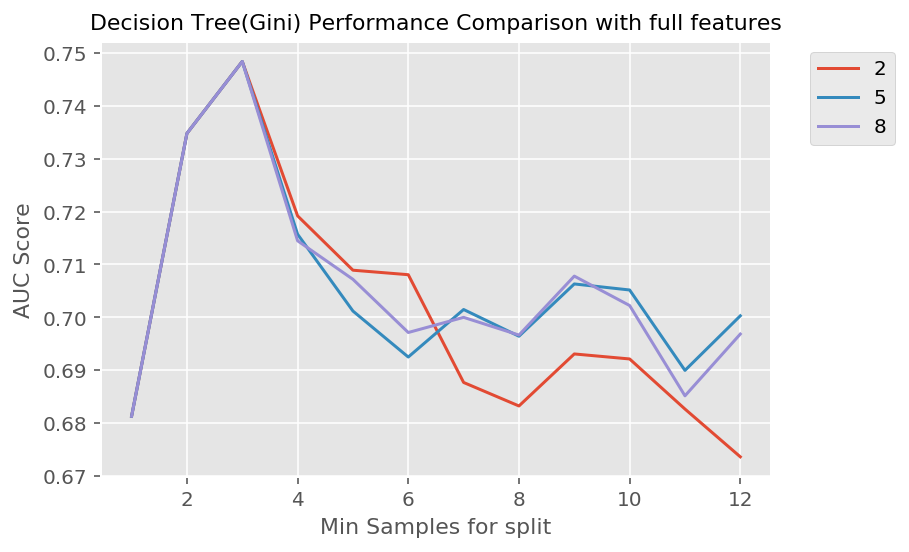

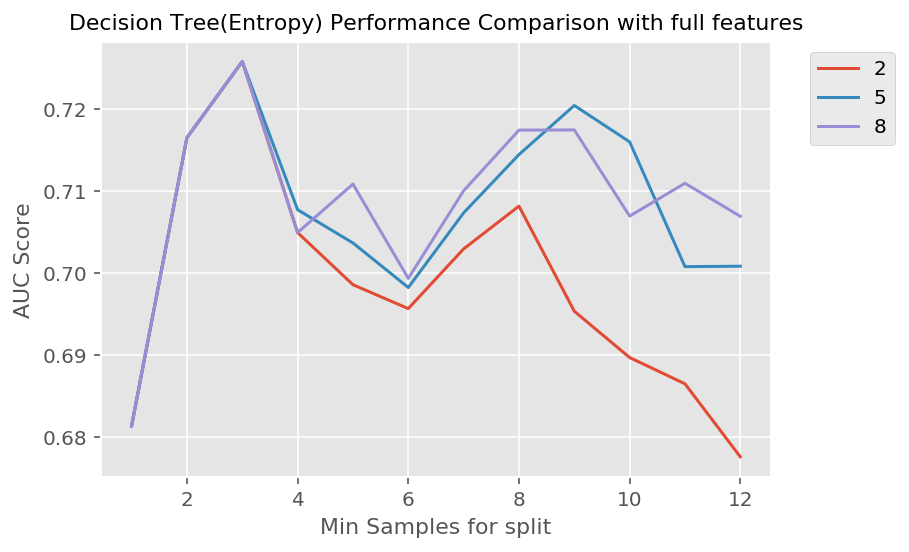

In [42]:
df_dt = results_dt[results_dt['criterion'] == 'gini'].pivot(index='max_depth',columns='min_samples_split',values='score')
quickPlot(df_dt, 'Decision Tree(Gini) Performance Comparison with full features', 'Min Samples for split', 'AUC Score')
df_dt = results_dt[results_dt['criterion'] == 'entropy'].pivot(index='max_depth',columns='min_samples_split',values='score')
quickPlot(df_dt, 'Decision Tree(Entropy) Performance Comparison with full features', 'Min Samples for split', 'AUC Score')

In [43]:
dt_best12, results_dt12 = getResults(gs_dt, D_train_12, 'Decision Tree with top 12 features')
results_dt12.head()

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Parameters for Decision Tree with top 12 features: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

Best Score for Decision Tree with top 12 features: 0.7378522837706512

Best estimator for Decision Tree with top 12 features: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.8s finished


,criterion,max_depth,min_samples_split,score
0,gini,1,2,0.681293
1,gini,1,5,0.681293
2,gini,1,8,0.681293
3,gini,2,2,0.722789
4,gini,2,5,0.722789


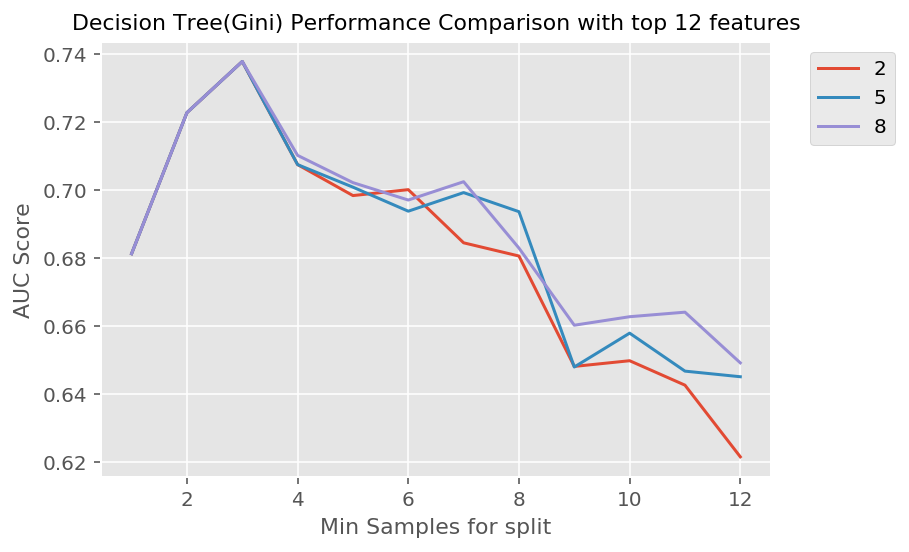

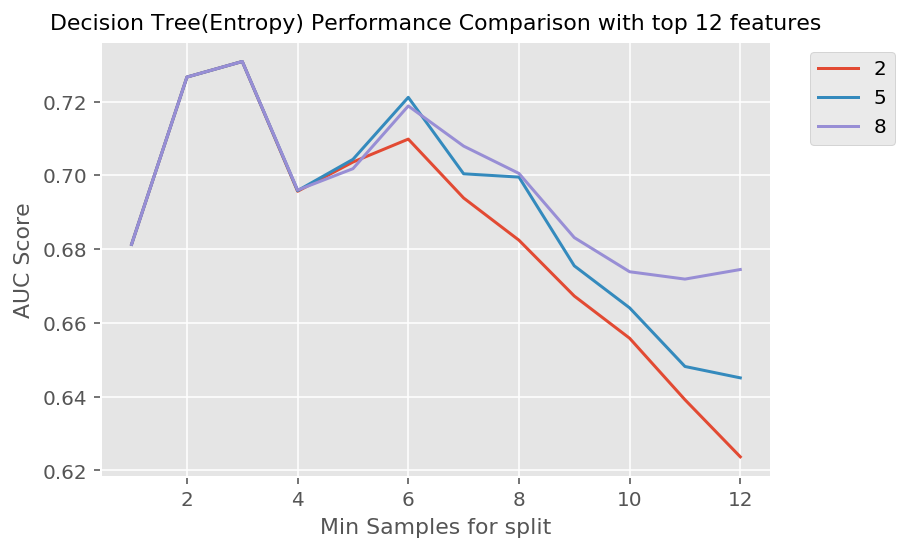

In [44]:
df_dt_gini12 = results_dt12[results_dt12['criterion'] == 'gini'].pivot(index='max_depth',columns='min_samples_split',values='score')
quickPlot(df_dt_gini12, 'Decision Tree(Gini) Performance Comparison with top 12 features', 'Min Samples for split', 'AUC Score')
df_dt_entropy12 = results_dt12[results_dt12['criterion'] == 'entropy'].pivot(index='max_depth',columns='min_samples_split',values='score')
quickPlot(df_dt_entropy12, 'Decision Tree(Entropy) Performance Comparison with top 12 features', 'Min Samples for split', 'AUC Score')

Best AUC Score for Decision Tree with full features is 0.7483965014577258.<br />
Best AUC Score for Decision Tree with top 12 features selected by F-Score is 0.7378522837706512.<br />

This shows with top 12 feature selection, the performance has slightly dropped in comparison to full feature selection.

## Performance Comparison<a name="perf"></a>

In this part, I fit the best models from the above evaluation on the test data with 10-fold stratified cross validation and 3 repetitions.
Then, performance of below models are compared using paired t-test:

* KNN (full features) vs. KNN (top 12 features)
* DT (full features) vs. DT (top 12 features)
* NB (full features) vs. NB (top 12 features)

Top 12 Features:

* KNN (top 12 features) vs. DT (top 12 features)
* NB (top 12 features) vs. DT (top 12 features)
* NB (top 12 features) vs. KNN (top 12 features)

In [45]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,
                                          random_state=2)

Defining the function for cross_val_score.

In [46]:
def cross_val_quick(best_estimator, X_data):
    cv_results = cross_val_score(estimator=best_estimator,
                                 X=X_data,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 scoring=scoring_metric)
    return(cv_results)

In [47]:
# KNN
cv_results_knn = cross_val_quick(knn_best, D_test)
cv_results_knn_12 = cross_val_quick(knn_best12, D_test_12)
print("KNN (full features):",cv_results_knn.mean())
print("KNN (top 12 features):",cv_results_knn_12.mean())
# NB
D_test_trans = PowerTransformer().fit_transform(D_test)
D_test_12_trans = PowerTransformer().fit_transform(D_test_12)
cv_results_nb = cross_val_quick(nb_best, D_test_trans)
cv_results_nb_12 = cross_val_quick(nb_best12, D_test_12_trans)
print("NB (full features):",cv_results_nb.mean())
print("NB(top 12 features):",cv_results_nb_12.mean())
# DT
cv_results_dt = cross_val_quick(dt_best, D_test)
cv_results_dt_12 = cross_val_quick(dt_best12, D_test_12)
print("DT (full features):",cv_results_dt.mean())
print("DT(top 12 features):",cv_results_dt_12.mean())

KNN (full features): 0.7067901234567902
KNN (top 12 features): 0.716931216931217
NB (full features): 0.7317460317460317
NB(top 12 features): 0.7650793650793651
DT (full features): 0.6560846560846562
DT(top 12 features): 0.6713403880070546


All models performs better with top 12 features selected by F-score than using full features.

In [48]:
print(stats.ttest_rel(cv_results_nb, cv_results_nb_12).pvalue.round(3))
print(stats.ttest_rel(cv_results_dt, cv_results_dt_12).pvalue.round(3))
print(stats.ttest_rel(cv_results_knn, cv_results_knn_12).pvalue.round(3))

0.002
0.078
0.349


Naive Bayes performance of top 12 features selected by F-score has performed statistically better than full features at 95% significance level.<br />
For all other models, it shows difference is statistically significant at 95% significance level.

In [49]:
print(stats.ttest_rel(cv_results_knn_12, cv_results_dt_12).pvalue.round(3))
print(stats.ttest_rel(cv_results_nb_12, cv_results_dt_12).pvalue.round(3))
print(stats.ttest_rel(cv_results_nb_12, cv_results_knn_12).pvalue.round(3))

0.004
0.0
0.0


At 95% significance, NB is statistically the best model with top 12 feature selected by F-score when compared on the test data in terms of AUC.<br /><br />

AUC scoring metric was used to optimise the algorithm hyperparameters. But also the below metrics to analyse models on test data should be considered.
* Confusion Matrix
* Accuracy
* Precision
* Recall
* F1 Score
    


In [50]:
pred_knn = gs_knn.predict(D_test_12)
pred_nb = gs_nb.predict(D_test_12_trans)
pred_dt = gs_dt.predict(D_test_12)

from sklearn import metrics
# KNN
print(f"\nKNN Confusion matrix:\n{metrics.confusion_matrix(t_test, pred_knn)}") 
print(f"\nKNN Classification report:\n{metrics.classification_report(t_test, pred_knn)}") 
# DT
print(f"\nDT Confusion matrix:\n{metrics.confusion_matrix(t_test, pred_dt)}") 
print(f"\nDT Classification report:\n{metrics.classification_report(t_test, pred_dt)}") 
# NB
print(f"\nNB Confusion matrix:\n{metrics.confusion_matrix(t_test, pred_nb)}") 
print(f"\nNB Classification report:\n{metrics.classification_report(t_test, pred_nb)}") 


KNN Confusion matrix:
[[ 47  43]
 [ 38 172]]

KNN Classification report:
              precision    recall  f1-score   support

           0       0.55      0.52      0.54        90
           1       0.80      0.82      0.81       210

   micro avg       0.73      0.73      0.73       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.73      0.73      0.73       300


DT Confusion matrix:
[[ 44  46]
 [ 38 172]]

DT Classification report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.51        90
           1       0.79      0.82      0.80       210

   micro avg       0.72      0.72      0.72       300
   macro avg       0.66      0.65      0.66       300
weighted avg       0.71      0.72      0.72       300


NB Confusion matrix:
[[  0  90]
 [  0 210]]

NB Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       

Suppose the bank wants to predict the 'bad' credit risk of the borrowers in order to avoid giving them the loans then the recall of '0'(bad) is an important metric to consider. K-Nearest Neighbor has the highest recall value for '0'. It also has better precision and f1-score value for '0' prediction.   

## Limitations and Proposed Solutions <a name ="lim"></a>
* Best 12 features were selected in our model fitting. But those 12 may not be the optimal number of features. It requires deep analysis to determine optimal number of features.
* The selection for hyperparameter tunning parameters can be termed bias as there is no reasoning behind selecting those values. It also requires more analysis and needs to be fine tune.
* Naive Bayes return as the best model in regards to both training and test data but its prediction on borrowers having 'bad' credit is 0 as per confusion matrix and classification reports. This model is therefore not the best model for any future prediction. K-Nearest Neighbor should be used instead as it has performed better than Decision Tree in training set, test set and also on confusion matrix and classification reports.


## Summary<a name="summ"></a>
Naive Bayes model with the top 12 features selected by F-score returns highest cross-validated AUC score on the training data and also when evaluated on test data compared to Decision Tree and K-Nearest Neighbor. Naive Bayes outperforms both k-Nearest Neighbor and Decision Tree in regards to AUC. However, K-Nearest Neighbor yields the highest recall, precision and f-score value on test data with top 12 features selected by F-score for credit risk of 'bad'. Naive Bayes value for recall, precision and f-score is 0 on predicting credit risk of 'bad' as per classification reports and confusion matrix. Therefore Naive Bayes should not be used as prediction model since it cannot predict 'bad' credit risk of borrowers. K-Nearest Neighbor model with top 12 features selected by F-score is best model as per the evaluation.


## Reference<a name="ref"></a>
Hofmann, D. (1994). UCI Machine Learning Repository: Statlog (German Credit Data) Data Set. Retrieved 31 May 2020, from https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) 

Vanschoren, J. (2014). OpenML. OpenML: exploring machine learning better, together. Retrieved 31 May 2020, from https://www.openml.org/d/31. 

Case Study: Predicting Income Status. (n.d.). Retrieved May 31, 2020, from https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/

Regression Case Study. (n.d.). Retrieved May 31, 2020, from https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/

Predicting Student Performance in Mathematics. (2019, July 23). Retrieved May 31, 2020, from https://www.kaggle.com/keddy730/predicting-student-performance-in-mathematics